# Time Series Basics

In [438]:
# Initial imports
import pandas as pd
import os
import datetime
import requests
import alpaca_trade_api as tradeapi
from pathlib import Path
from datetime import datetime,date
import hvplot.pandas
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import ccxt

%matplotlib inline
from dotenv import load_dotenv

## Import Cryptos Data Using KRAKEN API KEY

In [439]:
# Load environment variables
load_dotenv()

# Import environment variables
Kraken_Public_Key = os.getenv("KRAKEN_API_KEY")
Kraken_Secret_Key = os.getenv("KRAKEN_SECRET_KEY")

# Set the public and private keys for the API
exchange = ccxt.kraken({
    'apiKey': Kraken_Public_Key,
    'secret': Kraken_Secret_Key,
})

# Verify that environment variables were loaded
print(f"Kraken key data type: {type(Kraken_Public_Key)}")
print(f"Kraken secren data type: {type(Kraken_Secret_Key)}")

# Connect to Kraken and load the available cryptocurrencies
Crypto_Details = exchange.load_markets()

# Import data as a Pandas DataFrame
Crypto_df = pd.DataFrame(Crypto_Details)

# Display sample data
Crypto_df

Kraken key data type: <class 'NoneType'>
Kraken secren data type: <class 'NoneType'>


,AAVE/ETH,AAVE/EUR,AAVE/GBP,AAVE/USD,AAVE/BTC,ADA/ETH,ADA/EUR,ADA/USD,ADA/USDT,ADA/BTC,...,ZEC/EUR,ZEC/USD,YFI/ETH,YFI/EUR,YFI/USD,YFI/BTC,EUR/USD,GBP/USD,USD/CAD,USD/JPY
percentage,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
tierBased,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
taker,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,...,0.0026,0.0026,0.0026,0.0026,0.0026,0.0026,0.002,0.002,0.002,0.002
maker,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,...,0.0016,0.0016,0.0016,0.0016,0.0016,0.0016,0.002,0.002,0.002,0.002
tiers,"{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...",...,"{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000...","{'taker': [[0, 0.0026], [50000, 0.0024], [1000..."
precision,"{'amount': 8, 'price': 4}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 6}","{'amount': 8, 'price': 7}","{'amount': 8, 'price': 6}","{'amount': 8, 'price': 6}","{'amount': 8, 'price': 6}","{'amount': 8, 'price': 8}",...,"{'amount': 8, 'price': 3}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 2}","{'amount': 8, 'price': 0}","{'amount': 8, 'price': 0}","{'amount': 8, 'price': 4}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 5}","{'amount': 8, 'price': 3}"
limits,"{'amount': {'min': 0.1, 'max': 100000000.0}, '...","{'amount': {'min': 0.1, 'max': 100000000.0}, '...","{'amount': {'min': 0.1, 'max': 100000000.0}, '...","{'amount': {'min': 0.1, 'max': 100000000.0}, '...","{'amount': {'min': 0.1, 'max': 100000000.0}, '...","{'amount': {'min': 50.0, 'max': 100000000.0}, ...","{'amount': {'min': 50.0, 'max': 100000000.0}, ...","{'amount': {'min': 50.0, 'max': 100000000.0}, ...","{'amount': {'min': 50.0, 'max': 100000000.0}, ...","{'amount': {'min': 50.0, 'max': 100000000.0}, ...",...,"{'amount': {'min': 0.03, 'max': 100000000.0}, ...","{'amount': {'min': 0.03, 'max': 100000000.0}, ...","{'amount': {'min': 0.0001, 'max': 100000000.0}...","{'amount': {'min': 0.0001, 'max': 100000000.0}...","{'amount': {'min': 0.0001, 'max': 100000000.0}...","{'amount': {'min': 0.0001, 'max': 100000000.0}...","{'amount': {'min': 10.0, 'max': 100000000.0}, ...","{'amount': {'min': 10.0, 'max': 100000000.0}, ...","{'amount': {'min': 10.0, 'max': 100000000.0}, ...","{'amount': {'min': 10.0, 'max': 100000000.0}, ..."
id,AAVEETH,AAVEEUR,AAVEGBP,AAVEUSD,AAVEXBT,ADAETH,ADAEUR,ADAUSD,ADAUSDT,ADAXBT,...,XZECZEUR,XZECZUSD,YFIETH,YFIEUR,YFIUSD,YFIXBT,ZEURZUSD,ZGBPZUSD,ZUSDZCAD,ZUSDZJPY
symbol,AAVE/ETH,AAVE/EUR,AAVE/GBP,AAVE/USD,AAVE/BTC,ADA/ETH,ADA/EUR,ADA/USD,ADA/USDT,ADA/BTC,...,ZEC/EUR,ZEC/USD,YFI/ETH,YFI/EUR,YFI/USD,YFI/BTC,EUR/USD,GBP/USD,USD/CAD,USD/JPY
base,AAVE,AAVE,AAVE,AAVE,AAVE,ADA,ADA,ADA,ADA,ADA,...,ZEC,ZEC,YFI,YFI,YFI,YFI,EUR,GBP,USD,USD


In [440]:
# Print column values of DataFrame
print(type(Crypto_df.columns.values))
print(Crypto_df.columns.values)
print(len(Crypto_df.columns.values))
# Show list of available functions for the current exchange (in this case Kraken)
exchange.has

<class 'numpy.ndarray'>
['AAVE/ETH' 'AAVE/EUR' 'AAVE/GBP' 'AAVE/USD' 'AAVE/BTC' 'ADA/ETH'
 'ADA/EUR' 'ADA/USD' 'ADA/USDT' 'ADA/BTC' 'ALGO/ETH' 'ALGO/EUR' 'ALGO/USD'
 'ALGO/BTC' 'ANT/ETH' 'ANT/EUR' 'ANT/USD' 'ANT/BTC' 'ATOM/ETH' 'ATOM/EUR'
 'ATOM/USD' 'ATOM/BTC' 'AUD/JPY' 'AUD/USD' 'BAL/ETH' 'BAL/EUR' 'BAL/USD'
 'BAL/BTC' 'BAT/ETH' 'BAT/EUR' 'BAT/USD' 'BAT/BTC' 'BCH/AUD' 'BCH/ETH'
 'BCH/EUR' 'BCH/GBP' 'BCH/JPY' 'BCH/USD' 'BCH/USDT' 'BCH/BTC' 'COMP/ETH'
 'COMP/EUR' 'COMP/USD' 'COMP/BTC' 'CRV/ETH' 'CRV/EUR' 'CRV/USD' 'CRV/BTC'
 'DAI/EUR' 'DAI/USD' 'DAI/USDT' 'DASH/EUR' 'DASH/USD' 'DASH/BTC' 'DOT/ETH'
 'DOT/EUR' 'DOT/USD' 'DOT/USDT' 'DOT/BTC' 'EOS/ETH' 'EOS/EUR' 'EOS/USD'
 'EOS/USDT' 'EOS/BTC' 'ETH2.S/ETH' 'ETH/AUD' 'ETH/CHF' 'ETH/DAI'
 'ETH/USDC' 'ETH/USDT' 'EUR/AUD' 'EUR/CAD' 'EUR/CHF' 'EUR/GBP' 'EUR/JPY'
 'FIL/ETH' 'FIL/EUR' 'FIL/USD' 'FIL/BTC' 'GNO/ETH' 'GNO/EUR' 'GNO/USD'
 'GNO/BTC' 'GRT/ETH' 'GRT/EUR' 'GRT/USD' 'GRT/BTC' 'ICX/ETH' 'ICX/EUR'
 'ICX/USD' 'ICX/BTC' 'KAVA/ETH' 'KAVA/EUR' 

{'loadMarkets': True,
 'cancelAllOrders': False,
 'cancelOrder': True,
 'cancelOrders': False,
 'CORS': False,
 'createDepositAddress': True,
 'createLimitOrder': True,
 'createMarketOrder': True,
 'createOrder': True,
 'deposit': False,
 'editOrder': 'emulated',
 'fetchBalance': True,
 'fetchClosedOrders': True,
 'fetchCurrencies': True,
 'fetchDepositAddress': True,
 'fetchDeposits': True,
 'fetchL2OrderBook': True,
 'fetchLedger': True,
 'fetchMarkets': True,
 'fetchMyTrades': True,
 'fetchOHLCV': True,
 'fetchOpenOrders': True,
 'fetchOrder': True,
 'fetchOrderBook': True,
 'fetchOrderBooks': False,
 'fetchOrders': False,
 'fetchOrderTrades': 'emulated',
 'fetchStatus': 'emulated',
 'fetchTicker': True,
 'fetchTickers': True,
 'fetchTime': True,
 'fetchTrades': True,
 'fetchTradingFee': True,
 'fetchTradingFees': True,
 'fetchFundingFee': False,
 'fetchFundingFees': False,
 'fetchTradingLimits': False,
 'fetchTransactions': False,
 'fetchWithdrawals': True,
 'privateAPI': True,
 'p

## Fetch Historical Data for BTC/USD and ETH/USD

In [441]:
# Fetch daily candlestick bar data from `BTC/USD`
BTC_Historical_Prices = exchange.fetch_ohlcv("BTC/USD", "1d")
# Fetch daily candlestick bar data from `ETH/USD`
ETH_Historical_Prices = exchange.fetch_ohlcv("ETH/USD", "1d")
# Fetch daily candlestick bar data from `XRP/USD`
XRP_Historical_Prices = exchange.fetch_ohlcv("XRP/USD", "1d")

# Import the data as a Pandas DataFrame and set the columns
BTC_Historical_Prices_df = pd.DataFrame(
    BTC_Historical_Prices, columns=["timestamp", "open", "high", "low", "close", "volume"]
)
ETH_Historical_Prices_df = pd.DataFrame(
    ETH_Historical_Prices, columns=["timestamp", "open", "high", "low", "close", "volume"]
)
XRP_Historical_Prices_df = pd.DataFrame(
    XRP_Historical_Prices, columns=["timestamp", "open", "high", "low", "close", "volume"]
)

# Convert epoch timestamp to date using the `to_datetime` function and `unit` parameter
BTC_Historical_Prices_df["date"] = pd.to_datetime(
    BTC_Historical_Prices_df["timestamp"], unit="ms"
)
ETH_Historical_Prices_df["date"] = pd.to_datetime(
    ETH_Historical_Prices_df["timestamp"], unit="ms"
)
XRP_Historical_Prices_df["date"] = pd.to_datetime(
    XRP_Historical_Prices_df["timestamp"], unit="ms"
)

# Pick all Cryptos close prices
BTC_df = BTC_Historical_Prices_df.drop(columns=["timestamp", "open", "high", "low", "volume"])
ETH_df = ETH_Historical_Prices_df.drop(columns=["timestamp", "open", "high", "low", "volume"])
XRP_df = XRP_Historical_Prices_df.drop(columns=["timestamp", "open", "high", "low", "volume"])
# Use the `rename` function and set the `columns` parameter to a dictionary of new column names
BTC_df = BTC_df.rename(columns={
    "close": "BTC_Close",
    "date": "Date"
})
ETH_df = ETH_df.rename(columns={
    "close": "ETH_Close",
    "date": "Date 1"
})
XRP_df = XRP_df.rename(columns={
    "close": "XRP_Close",
    "date": "Date 2"
})

# Use a list of re-ordered column names to alter the column order of the original DataFrame
BTC_df = BTC_df[["Date", "BTC_Close"]]
ETH_df = ETH_df[["Date 1", "ETH_Close"]]
XRP_df = XRP_df[["Date 2", "XRP_Close"]]
# Concatenate all DataFrames into a single DataFrame
Combined_Cryptos = pd.concat([ BTC_df, ETH_df, XRP_df ], axis="columns", join="inner")
Combined_Cryptos.sort_index(inplace=True)

# Remove extra date columns
Combined_Cryptos = Combined_Cryptos.drop(columns=["Date 1", "Date 2"])
Combined_Cryptos.tail()

,Date,BTC_Close,ETH_Close,XRP_Close
715,2021-01-09,40252.1,1280.43,0.32547
716,2021-01-10,38170.5,1255.15,0.31525
717,2021-01-11,35439.3,1088.94,0.28781
718,2021-01-12,34046.4,1049.98,0.29251
719,2021-01-13,33265.9,1035.40,0.29154


## Import Stocks Data using ALPACA API KEY

In [442]:
# Set Alpaca API key and secret
Alpaca_API_Key = os.getenv("ALPACA_API_KEY")
Alpaca_Secret_Key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
Alpaca = tradeapi.REST(
    Alpaca_API_Key,
    Alpaca_Secret_Key,
    base_url='https://paper-api.alpaca.markets', 
    api_version="v2")

# Format current date as ISO format
#Start_Date = pd.to_datetime('2016-01-1', parse_dates=True)
#End_Date = pd.to_datetime('2021-01-11', parse_dates=True)

Start_Date = pd.Timestamp("2016-01-1", tz="America/New_York").isoformat()
End_Date = pd.Timestamp("2021-01-12", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AAPL"]

#"BXP", "PLD", "NOC", "BA", "PYPL", "SQ", "JNJ", "PFE", "TSLA",
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for all Stocks
Data = Alpaca.get_barset(
    tickers,
    timeframe,
    start = Start_Date,
    end = End_Date
).df

# Preview DataFrame
Data.tail()

AAPL                                        
                             open      high      low     close     volume
2021-01-06 00:00:00-05:00  127.72  131.0499  126.382  126.5800  142064548
2021-01-07 00:00:00-05:00  128.36  131.6300  127.860  130.8500   95314687
2021-01-08 00:00:00-05:00  132.43  132.6300  130.230  131.9900   93211863
2021-01-11 00:00:00-05:00  129.19  130.1700  128.500  128.9800   84845947
2021-01-12 00:00:00-05:00  128.50  129.6900  126.860  128.8199   83381829

In [443]:
def calculate_adjusted_prices(Data, close):
    """ Vectorized approach for calculating the adjusted prices for the
    specified column in the provided DataFrame. This creates a new column
    called 'adj_<column name>' with the adjusted prices. This function requires
    that the DataFrame have columns with dividend and split_ratio values.

    :param df: DataFrame with raw prices along with dividend and split_ratio
        values
    :param column: String of which price column should have adjusted prices
        created for it
    :return: DataFrame with the addition of the adjusted price column
    """
    adj_column = 'adj_' + close

    # Reverse the DataFrame order, sorting by date in descending order
    Data.sort_index(ascending=False, inplace=True)

    price_col = Data[close].values
    split_col = Data['split_ratio'].values
    dividend_col = Data['dividend'].values
    adj_price_col = np.zeros(len(Data.index))
    adj_price_col[0] = price_col[0]

    for i in range(1, len(price_col)):
        adj_price_col[i] = round((adj_price_col[i - 1] + adj_price_col[i - 1] *
                   (((price_col[i] * split_col[i - 1]) -
                     price_col[i - 1] -
                     dividend_col[i - 1]) / price_col[i - 1])), 4)

    Data[adj_column] = adj_price_col

    # Change the DataFrame order back to dates ascending
    Data.sort_index(ascending=True, inplace=True)

    return Data

In [444]:
# Format the DateTime to remove Time
Data.index = Data.index.strftime("%Y-%m-%d")
# Pick all Stocks volumes
AAPL_volume_df = Data["AAPL"]["volume"]
# Rename Column
AAPL_volume_df.columns = ["Apple"]

# Select all rows for 5 Days
volume_5days = AAPL_volume_df.loc['2021-01-05':'2021-01-12']
# Select all rows for 1 Month
volume_1Month = AAPL_volume_df.loc['2020-12-12':'2021-01-12']
# Select all rows for 3 Month
volume_3Months = AAPL_volume_df.loc['2020-10-12':'2021-01-12']
# Select all rows for 6 Months
volume_6Months = AAPL_volume_df.loc['2020-06-12':'2021-01-12']
# Select all rows for 1 Year
volume_1Year = AAPL_volume_df.loc['2019-01-12':'2021-01-12']

## Plot the Results

In [445]:
# Plot 5 Days
volume_5days.hvplot.bar(
    figsize=(20,15), 
    subplots=True, 
    title=('Volumes Over 5 Days'),
    height=330,
    width=2000,
    ylabel='Total Volumes', 
    xlabel='Total Number of Days',
    grid=True).opts(yformatter='%.0f', fontsize={'title': 20, 'labels': 15, 'xticks': 12, 'yticks': 15})

:Bars   [index]   (volume)

In [446]:
# Plot 1 Month
volume_1Month.hvplot.bar(
    figsize=(20,15),
    rot=90,
    height=330,
    width=2000,
    subplots=True, 
    title=('Volumes Over 30 Days Period'), 
    ylabel='Apple Inc', 
    xlabel='Total Number of Days',
    grid=True).opts(yformatter='%.0f', fontsize={'title': 20, 'labels': 15, 'xticks': 10, 'yticks': 15})

:Bars   [index]   (volume)

In [447]:
# Plot 3 Months
volume_3Months.hvplot.bar(
    figsize=(20,15),
    rot=90,
    height=330,
    width=2000,
    subplots=True, 
    title=('Volumes Over 3 Months Period'), 
    ylabel='Apple Inc', 
    xlabel='Total Number of Days',
    grid=True).opts(yformatter='%.0f', fontsize={'title': 20, 'labels': 15, 'xticks': 10, 'yticks': 15})

:Bars   [index]   (volume)

In [448]:
# Plot 6 Months
volume_6Months.hvplot.bar(
    figsize=(20,15),
    rot=90,
    height=330,
    width=2000,
    subplots=True,
    title=('Volumes Over 6 Months Period'), 
    ylabel='Apple Inc', 
    xlabel='Total Number of Days',
    grid=True).opts(yformatter='%.0f', fontsize={'title': 20, 'labels': 15, 'xticks': 9, 'yticks': 15})

:Bars   [index]   (volume)

In [449]:
# Plot 1 Year
volume_1Year_plot = volume_1Year.hvplot.bar(
    figsize=(20,15),
    rot=90,
    height=330,
    width=2000,
    subplots=True, 
    title=('Volumes Over 12 Months Period'), 
    ylabel='Apple Inc', 
    xlabel='Total Number of Days',
    grid=True).opts(yformatter='%.0f', fontsize={'title': 20, 'labels': 15, 'xticks': 3, 'yticks': 15})
volume_1Year_plot

:Bars   [index]   (volume)

## Use Bokeh Libraries for CandleStick Plots

In [450]:
# Import Brick Plot
import bokeh
bokeh.sampledata.download()
from math import pi
from bokeh.plotting import figure, output_file, show
from bokeh.sampledata.stocks import AAPL

Using data directory: /Users/miladnazar/.bokeh/data
Skipping 'CGM.csv' (checksum match)
Skipping 'US_Counties.zip' (checksum match)
Skipping 'us_cities.json' (checksum match)
Skipping 'unemployment09.csv' (checksum match)
Skipping 'AAPL.csv' (checksum match)
Skipping 'FB.csv' (checksum match)
Skipping 'GOOG.csv' (checksum match)
Skipping 'IBM.csv' (checksum match)
Skipping 'MSFT.csv' (checksum match)
Skipping 'WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip' (checksum match)
Skipping 'gapminder_fertility.csv' (checksum match)
Skipping 'gapminder_population.csv' (checksum match)
Skipping 'gapminder_life_expectancy.csv' (checksum match)
Skipping 'gapminder_regions.csv' (checksum match)
Skipping 'world_cities.zip' (checksum match)
Skipping 'airports.json' (checksum match)
Skipping 'movies.db.zip' (checksum match)
Skipping 'airports.csv' (checksum match)
Skipping 'routes.csv' (checksum match)
Skipping 'haarcascade_frontalface_default.xml' (checksum match)


In [451]:
# Pick all Stocks close prices
AAPL_close_df = Data["AAPL"]["close"]
# Rename Column
AAPL_close_df.columns = ["Apple"]

In [452]:
# Plot 5 Days Closing Prices
price_5Days = Data["AAPL"]['2020-12-05':'2021-01-12']
price_5Days["date"] = pd.to_datetime(price_5Days.index)

inc = price_5Days.close > price_5Days.open
dec = price_5Days.open > price_5Days.close
w = 12*60*60*1000 # half day in ms

TOOLS = "point_draw,poly_draw,box_edit,pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select,hover,help"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=2000, height=500)

p.title.text = "APPLE Closing Prices Over 5 Days Period"
p.title.align = "center"
p.title.text_font_size = "25px"

p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(price_5Days.date, price_5Days.high, price_5Days.date, price_5Days.low, color="black")
p.vbar(price_5Days.date[inc], w, price_5Days.open[inc], price_5Days.close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(price_5Days.date[dec], w, price_5Days.open[dec], price_5Days.close[dec], fill_color="#F2583E", line_color="black")

output_file("candlestick.html", title="candlestick.py example")

show(p)  # open a browser

In [453]:
# Plot 1 Month Closing Prices
price_1Month = Data["AAPL"]['2020-12-12':'2021-01-12']
price_1Month["date"] = pd.to_datetime(price_1Month.index)

inc = price_1Month.close > price_1Month.open
dec = price_1Month.open > price_1Month.close
w = 12*60*60*1000 # half day in ms

TOOLS = "point_draw,poly_draw,box_edit,pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select,hover,help"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=2000, height=500)

p.title.text = "APPLE Closing Prices Over 30 Days Period"
p.title.align = "center"
p.title.text_font_size = "25px"

p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(price_1Month.date, price_1Month.high, price_1Month.date, price_1Month.low, color="black")
p.vbar(price_1Month.date[inc], w, price_1Month.open[inc], price_1Month.close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(price_1Month.date[dec], w, price_1Month.open[dec], price_1Month.close[dec], fill_color="#F2583E", line_color="black")

output_file("candlestick.html", title="candlestick.py example")

show(p)  # open a browser

In [454]:
# Plot 3 Months Closing Prices
price_3Months = Data["AAPL"]['2020-10-12':'2021-01-12']
price_3Months["date"] = pd.to_datetime(price_3Months.index)

inc = price_3Months.close > price_3Months.open
dec = price_3Months.open > price_3Months.close
w = 12*60*60*1000 # half day in ms

TOOLS = "point_draw,poly_draw,box_edit,pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select,hover,help"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=2000, height=500)

p.title.text = "APPLE Closing Prices Over 3 Months Period"
p.title.align = "center"
p.title.text_font_size = "25px"

p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(price_3Months.date, price_3Months.high, price_3Months.date, price_3Months.low, color="black")
p.vbar(price_3Months.date[inc], w, price_3Months.open[inc], price_3Months.close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(price_3Months.date[dec], w, price_3Months.open[dec], price_3Months.close[dec], fill_color="#F2583E", line_color="black")

output_file("candlestick.html", title="candlestick.py example")

show(p)  # open a browser

In [455]:
# Plot 6 Months Closing Prices
price_6Months = Data["AAPL"]['2020-06-12':'2021-01-12']
price_6Months["date"] = pd.to_datetime(price_6Months.index)

inc = price_6Months.close > price_6Months.open
dec = price_6Months.open > price_6Months.close
w = 12*60*60*1000 # half day in ms

TOOLS = "point_draw,poly_draw,box_edit,pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select,hover,help"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=2000, height=500)

p.title.text = "APPLE Closing Prices Over 6 Months Period"
p.title.align = "center"
p.title.text_font_size = "25px"

p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(price_6Months.date, price_6Months.high, price_6Months.date, price_6Months.low, color="black")
p.vbar(price_6Months.date[inc], w, price_6Months.open[inc], price_6Months.close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(price_6Months.date[dec], w, price_6Months.open[dec], price_6Months.close[dec], fill_color="#F2583E", line_color="black")

output_file("candlestick.html", title="candlestick.py example")

show(p)  # open a browser

In [456]:
# Plot 12 Months Closing Prices
price_1Year = Data["AAPL"]['2020-01-12':'2021-01-12']
price_1Year["date"] = pd.to_datetime(price_1Year.index)

inc = price_1Year.close > price_1Year.open
dec = price_1Year.open > price_1Year.close
w = 12*60*60*1000 # half day in ms

TOOLS = "point_draw,poly_draw,box_edit,pan,wheel_zoom,box_zoom,reset,save,box_select,lasso_select,hover,help"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=2000, height=500)

p.title.text = "APPLE Closing Prices Over 12 Months Period"
p.title.align = "center"
p.title.text_font_size = "25px"

p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(price_1Year.date, price_1Year.high, price_1Year.date, price_1Year.low, color="black")
p.vbar(price_1Year.date[inc], w, price_1Year.open[inc], price_1Year.close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(price_1Year.date[dec], w, price_1Year.open[dec], price_1Year.close[dec], fill_color="#F2583E", line_color="black")

output_file("candlestick.html", title="candlestick.py example")

show(p)  # open a browser

In [457]:
# Calculate Daily Returns for all the stocks
AAPL_close_df_pct = AAPL_close_df.pct_change()
# Rename Column
AAPL_close_df_pct.columns = ["Apple"]

### Cumulative Returns

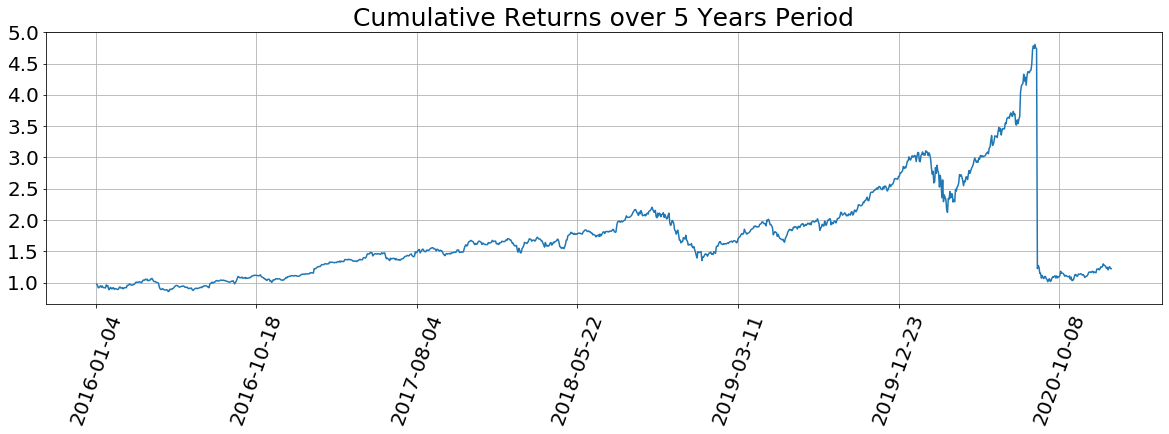

In [458]:
# Plot cumulative returns??????????????
Cumulative_Returns = (1 + AAPL_close_df_pct).cumprod()
Cumulative_Returns.plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Cumulative Returns over 5 Years Period", fontsize=25);

## Exponentially Weighted Moving Average

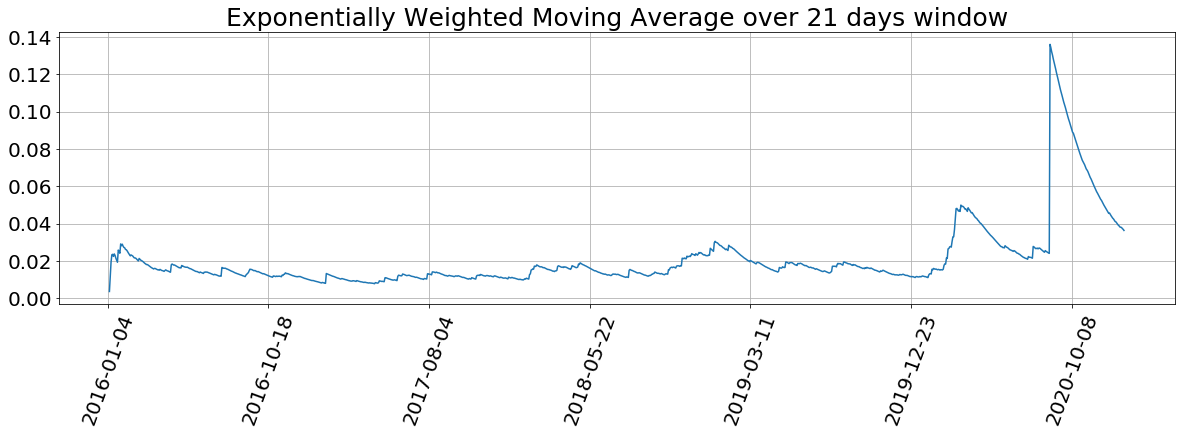

In [459]:
# Calculate a rolling window using the exponentially weighted moving average. 
AAPL_close_df_pct.ewm(halflife = 21).std().plot(
    kind='line', 
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Exponentially Weighted Moving Average over 21 days window", fontsize=25);

## Forecasting Using ARMA & ARIMA Model

In [460]:
# Making sure to drop NANS before Modeling
AAPL_close_df_pct = AAPL_close_df_pct.dropna()
AAPL_close_df_pct.head()

2016-01-05   -0.024874
2016-01-06   -0.019570
2016-01-07   -0.041311
2016-01-08    0.004558
2016-01-11    0.015983
Name: close, dtype: float64

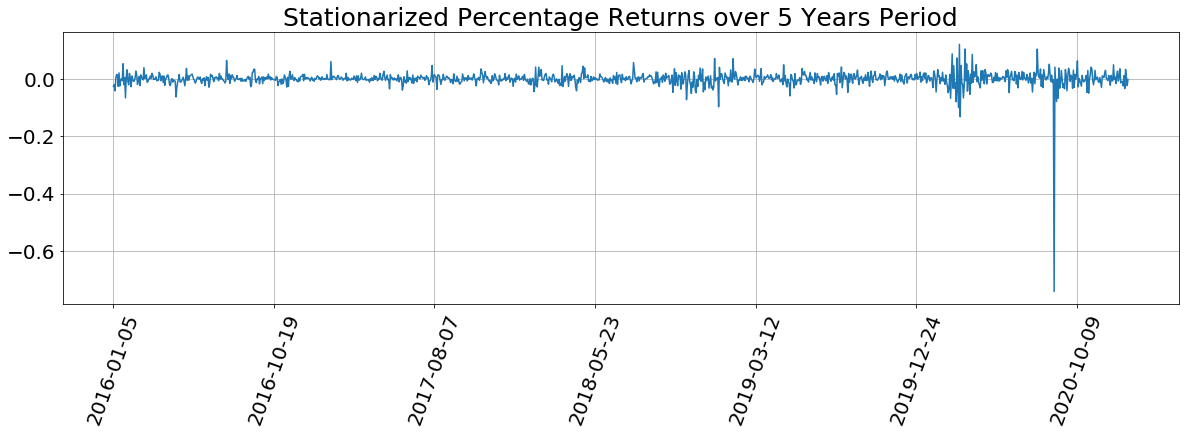

In [461]:
# Data must be Stationarized and here is the plot
from matplotlib import pyplot as plt    
AAPL_close_df_pct.plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Stationarized Percentage Returns over 5 Years Period", fontsize=25);

## ARMA Model for Apple Inc

In [462]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA
# Create the ARMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags
model = ARMA(AAPL_close_df_pct.values, order=(1,1))
# Fit the model to the data
results = model.fit()

In [463]:
# Create the ARMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags
model_ARMA_2 = ARMA(AAPL_close_df.values, order=(1,1))
# Fit the model to the data
results_close = model_ARMA_2.fit()

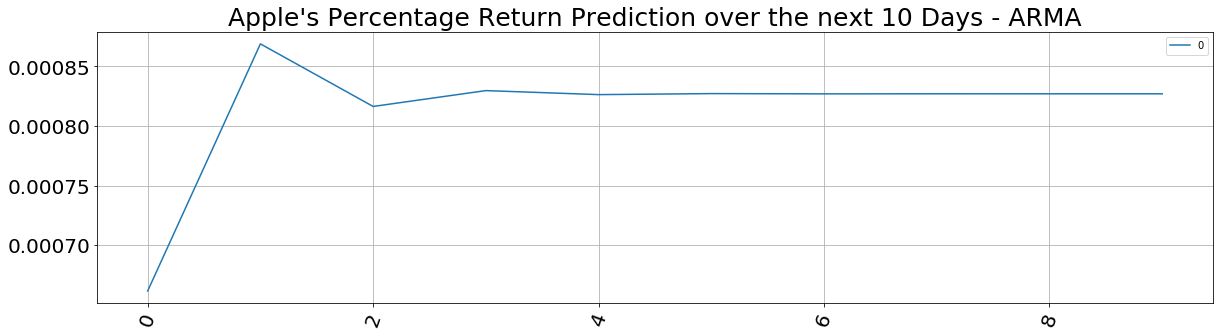

In [464]:
# Plot the forecasted return for the next 10 days
pd.DataFrame(results.forecast(steps=10)[0]).plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Apple's Percentage Return Prediction over the next 10 Days - ARMA", fontsize=25);

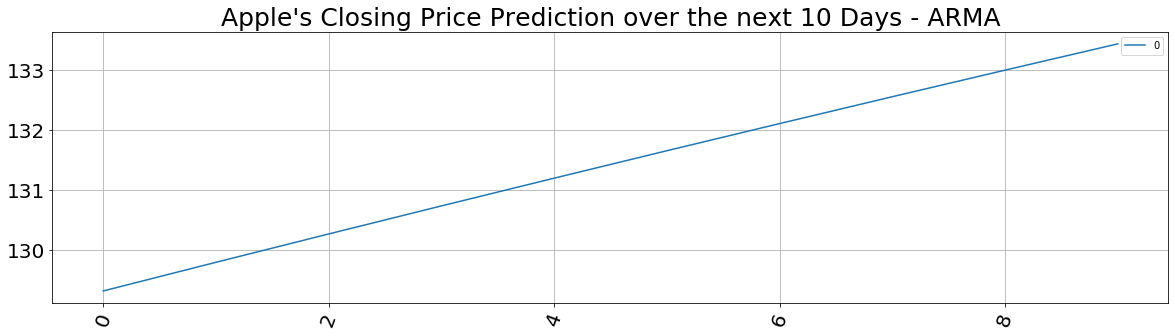

In [465]:
# Plot the forecasted return for the next 10 days
pd.DataFrame(results_close.forecast(steps=10)[0]).plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Apple's Closing Price Prediction over the next 10 Days - ARMA", fontsize=25);

In [466]:
# Summarize the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1265
Model:                     ARMA(1, 1)   Log Likelihood                2720.103
Method:                       css-mle   S.D. of innovations              0.028
Date:                Wed, 13 Jan 2021   AIC                          -5432.205
Time:                        01:00:57   BIC                          -5411.634
Sample:                             0   HQIC                         -5424.476
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.001      1.119      0.263      -0.001       0.002
ar.L1.y       -0.2533      0.202     -1.252      0.211      -0.650       0.143
ma.L1.y        0.1690      0.205      0.824      0.410      -0.233       0.571
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.9484           +0.0000j            3.9484            0.5000
MA.1           -5.9159           +0.0000j            5.9159            0.5000
-----------------------------------------------------------------------------
"""

In [467]:
results_close.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1266
Model:                     ARMA(1, 1)   Log Likelihood               -4856.692
Method:                       css-mle   S.D. of innovations             11.199
Date:                Wed, 13 Jan 2021   AIC                           9721.383
Time:                        01:00:57   BIC                           9741.958
Sample:                             0   HQIC                          9729.113
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        173.9323     26.964      6.451      0.000     121.084     226.780
ar.L1.y        0.9893      0.004    249.113      0.000       0.982       0.997
ma.L1.y       -0.0234      0.027     -0.855      0.393      -0.077       0.030
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0108           +0.0000j            1.0108            0.0000
MA.1           42.7336           +0.0000j           42.7336            0.0000
-----------------------------------------------------------------------------
"""

## ARIMA Model for Apple Inc

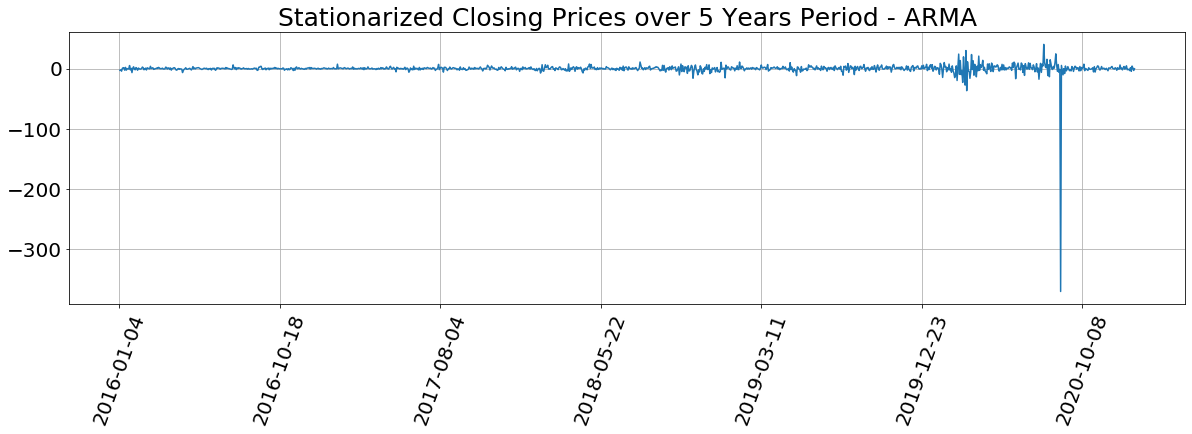

In [468]:
# Differencing the Close price stationarizes the time series
AAPL_close_df.diff().plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Stationarized Closing Prices over 5 Years Period - ARMA", fontsize=25);

## Autocorrelation and Partial Autocorrelation Analysis

In [469]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

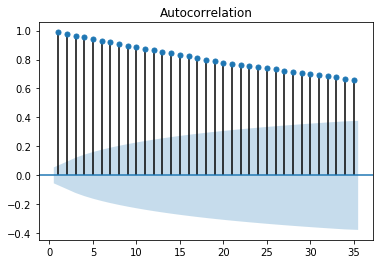

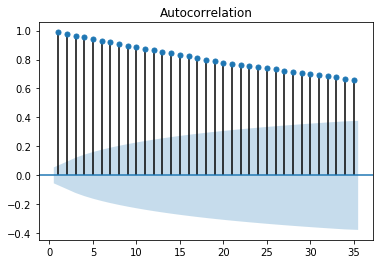

In [470]:
# Plot the autocorrelation of the Close Prices
plot_acf(AAPL_close_df, zero=False, lags=35)

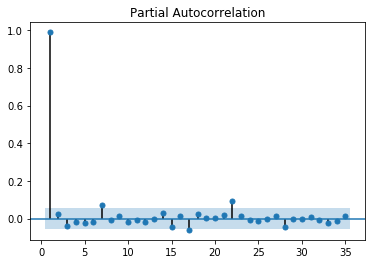

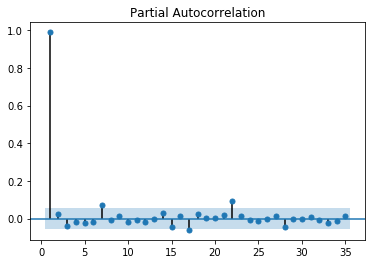

In [471]:
# Plot the partial autocorrelation of the returns
plot_pacf(AAPL_close_df, zero=False, lags=35)

In [472]:
from statsmodels.tsa.arima_model import ARIMA

In [473]:
# Create an ARIMA model
model = ARIMA(AAPL_close_df.values, order=(1, 1, 1))
# Fit the model to the data
results_ARIMA = model.fit()
# Print the model summary
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 1265
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4854.086
Method:                       css-mle   S.D. of innovations             11.227
Date:                Wed, 13 Jan 2021   AIC                           9716.171
Time:                        01:01:02   BIC                           9736.742
Sample:                             1   HQIC                          9723.900
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0186      0.308      0.060      0.952      -0.585       0.622
ar.L1.D.y     -0.4141      0.353     -1.174      0.241      -1.106       0.277
ma.L1.D.y      0.3800      0.358      1.062      0.288      -0.322       1.082
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.4148           +0.0000j            2.4148            0.5000
MA.1           -2.6317           +0.0000j            2.6317            0.5000
-----------------------------------------------------------------------------
"""

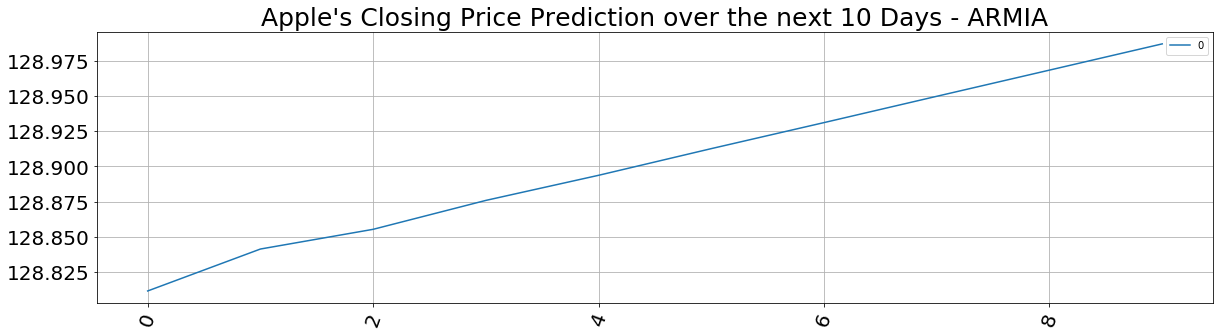

In [474]:
# Plot the Futures Price Forecast
pd.DataFrame(results_ARIMA.forecast(steps=10)[0]).plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="Apple's Closing Price Prediction over the next 10 Days - ARMIA", fontsize=25);

## ARIMA Model for BitCoin

In [529]:
# Create an ARIMA model for BitCoin
model_BTC = ARIMA(BTC_df["BTC_Close"].values, order=(1, 1, 1))
# Fit the model to the data
results_ARIMA_BTC = model_BTC.fit()
# Print the model summary
results_ARIMA_BTC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  719
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5404.922
Method:                       css-mle   S.D. of innovations            445.107
Date:                Wed, 13 Jan 2021   AIC                          10817.845
Time:                        01:23:58   BIC                          10836.156
Sample:                             1   HQIC                         10824.914
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.5610     21.593      1.878      0.060      -1.760      82.882
ar.L1.D.y      0.4965      0.172      2.879      0.004       0.158       0.835
ma.L1.D.y     -0.3449      0.185     -1.865      0.062      -0.707       0.018
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0140           +0.0000j            2.0140            0.0000
MA.1            2.8996           +0.0000j            2.8996            0.0000
-----------------------------------------------------------------------------
"""

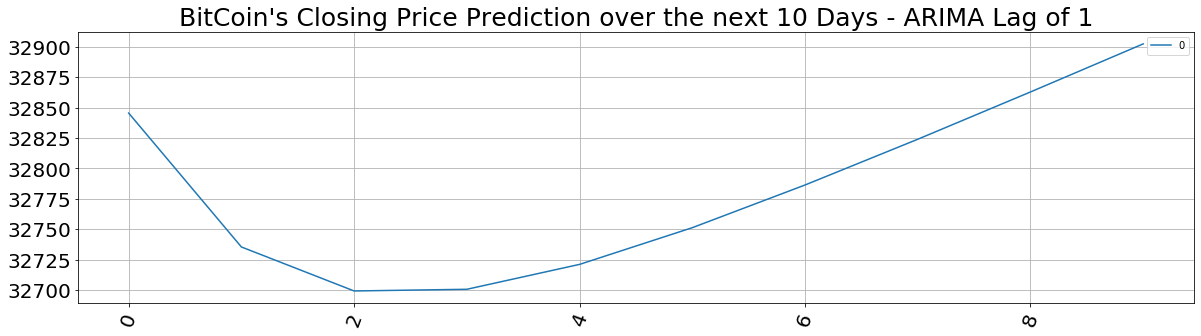

In [476]:
# Plot the Futures Price Forecast
pd.DataFrame(results_ARIMA_BTC.forecast(steps=10)[0]).plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="BitCoin's Closing Price Prediction over the next 10 Days - ARIMA Lag of 1", fontsize=25);

## ARIMA Model using a Lag of 2 for BitCoin

In [477]:
# Create an ARIMA Model and fit it to the data
model_2 = ARIMA(BTC_df["BTC_Close"].values, order=(2, 1, 1))
results_ARIMA_2 = model_2.fit()
# print the model summary
results_ARIMA_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  719
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -5404.912
Method:                       css-mle   S.D. of innovations            445.101
Date:                Wed, 13 Jan 2021   AIC                          10819.825
Time:                        01:01:05   BIC                          10842.714
Sample:                             1   HQIC                         10828.662
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.5909     21.531      1.885      0.059      -1.608      82.790
ar.L1.D.y      0.4405      0.442      0.997      0.319      -0.425       1.306
ar.L2.D.y      0.0122      0.086      0.142      0.887      -0.156       0.181
ma.L1.D.y     -0.2900      0.440     -0.659      0.510      -1.153       0.573
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.1428           +0.0000j            2.1428            0.0000
AR.2          -38.2465           +0.0000j           38.2465            0.5000
MA.1            3.4482           +0.0000j            3.4482            0.0000
-----------------------------------------------------------------------------
"""

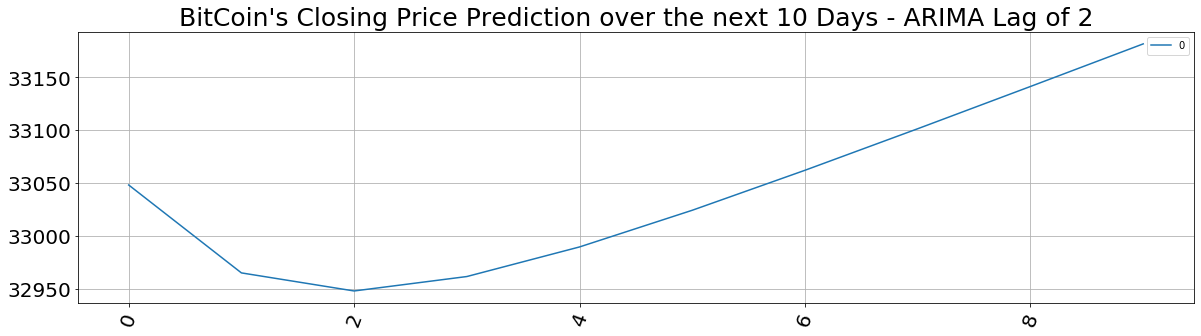

In [478]:
# Plot the Futures Price Forecast
pd.DataFrame(results_ARIMA_2.forecast(steps=10)[0]).plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="BitCoin's Closing Price Prediction over the next 10 Days - ARIMA Lag of 2", fontsize=25);

## Linear Regression with Train/Test split

In [510]:
import arch as arch
import warnings
warnings.filterwarnings('ignore')

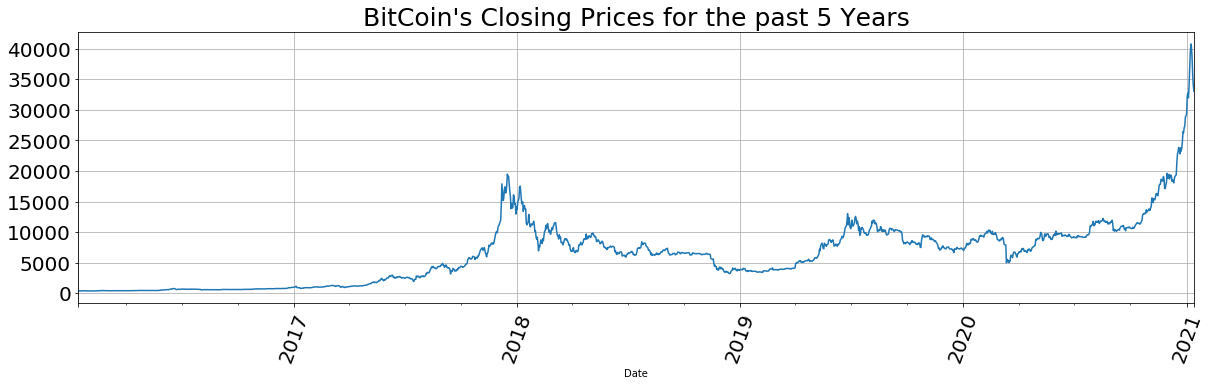

In [531]:
from pathlib import Path
BTC_path = Path('../Resources/BTC.csv')
BTC_csv = pd.read_csv(BTC_path, parse_dates=True, index_col='Date')
BTC_csv.Close.plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="BitCoin's Closing Prices for the past 5 Years", fontsize=25);

In [532]:
# Create a series using "Close" price percentage returns, drop any NaNs, and check the results:
# (Make sure to multiply the pct_change() results by *100)
BTC_csv['Return'] = BTC_csv.Close.pct_change() * 100
BTC_csv['Lagged_Return'] = BTC_csv['Return'].shift()
BTC_csv = BTC_csv.dropna()
BTC_csv.tail()

,Open,High,Low,Close,Adj Close,Volume,Return,Lagged_Return
Date,,,,,,,,
2021-01-09,40788.640625,41436.351563,38980.875000,40254.546875,40254.546875,61984162837,-1.331114,3.623390
2021-01-10,40254.218750,41420.191406,35984.628906,38356.441406,38356.441406,79980747690,-4.715257,-1.331114
2021-01-11,38346.531250,38346.531250,30549.599609,35566.656250,35566.656250,123320567398,-7.273316,-4.715257
2021-01-12,35516.359375,36568.527344,32697.976563,33922.960938,33922.960938,74773277909,-4.621450,-7.273316
2021-01-13,33963.351563,34061.976563,32643.052734,33017.734375,33017.734375,75174313984,-2.668477,-4.621450


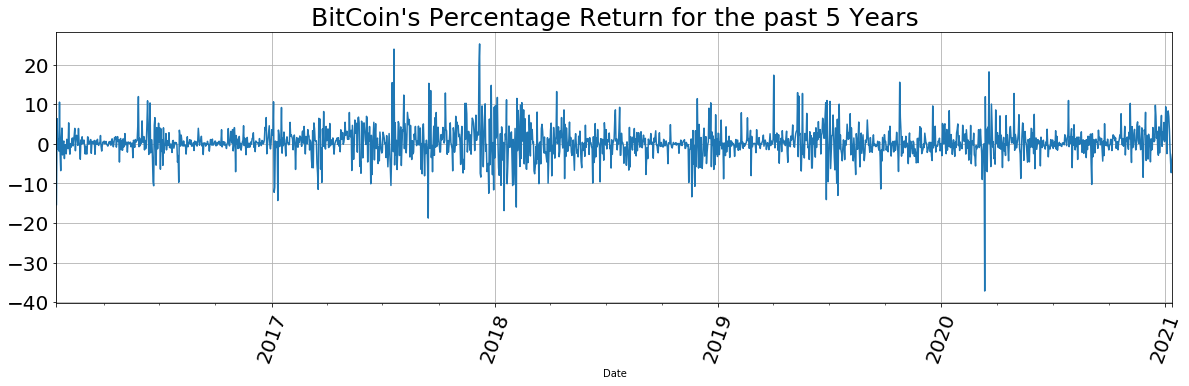

In [534]:
BTC_csv['Return'].plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="BitCoin's Percentage Return for the past 5 Years", fontsize=25);

In [558]:
# Create a train/test split for the data using 2017-2018 for training and 2019 for testing
train = BTC_csv['2017':'2019']
test = BTC_csv['2020']
# Create four DataFrames:
# X_train (training set using just the independent variables), X_test (test set of of just the independent variables)
# Y_train (training set using just the "y" variable, i.e., "Futures Return"), Y_test (test set of just the "y" variable):
X_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]
X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]

# Create a Linear Regression model and fit it to the training data
from sklearn.linear_model import LinearRegression

# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)

LinearRegression()

## Make predictions using the Testing Data

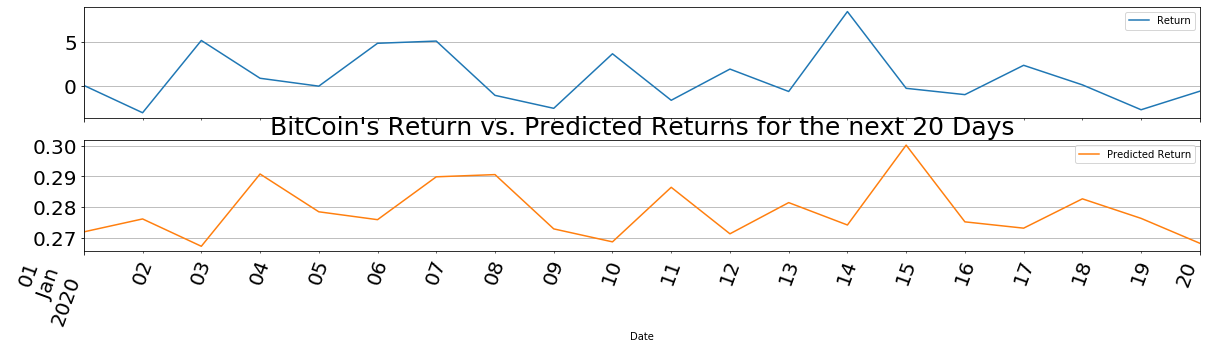

In [559]:
# Make a prediction of "y" values using just the test dataset
BTC_predictions = model_LR.predict(X_test)
# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a DataFrame:
Predictions_Results = y_test.to_frame()
Predictions_Results["Predicted Return"] = BTC_predictions

# Plot the first 20 predictions vs the true values
Results[:20].plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    subplots=True,
    grid=True);
plt.title(label="BitCoin's Return vs. Predicted Returns for the next 20 Days", fontsize=25);

## Out-of-Sample Performance


In [554]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate the mean_squared_error (MSE) on actual versus predicted test "y" 
# (Hint: use the DataFrame above)
mse = mean_squared_error(
    Predictions_Results["Return"],
    Predictions_Results["Predicted Return"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
out_of_sample_rmse = np.sqrt(mse)
print(f"Out-of-Sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")

Out-of-Sample Root Mean Squared Error (RMSE): 5.584323488669466


## In-Sample Performance

Evaluate the model using in-sample data (X_train and y_train)

In [555]:
# Construct a DataFrame using just the "y" training data:
in_sample_results = y_train.to_frame()

# Add a column of "in-sample" predictions to that DataFrame:  
in_sample_results["In-sample Predictions"] = model_LR.predict(X_train)

# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
in_sample_mse = mean_squared_error(
    in_sample_results["Return"],
    in_sample_results["In-sample Predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
in_sample_rmse = np.sqrt(in_sample_mse)
print(f"In-sample Root Mean Squared Error (RMSE): {in_sample_rmse}")

In-sample Root Mean Squared Error (RMSE): 3.652160182689113


## ARMA Model for BitCoin Prediction

In [565]:
# Create the ARMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags
model_5 = ARMA(BTC_csv['Return'].values, order=(1,1))
# Fit the model to the data
results_5 = model_5.fit()

# Look at Summary
results_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1826
Model:                     ARMA(1, 1)   Log Likelihood               -5091.650
Method:                       css-mle   S.D. of innovations              3.933
Date:                Wed, 13 Jan 2021   AIC                          10191.300
Time:                        01:45:54   BIC                          10213.340
Sample:                             0   HQIC                         10199.430
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3164      0.091      3.471      0.001       0.138       0.495
ar.L1.y       -0.8863      0.085    -10.466      0.000      -1.052      -0.720
ma.L1.y        0.8681      0.090      9.620      0.000       0.691       1.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1283           +0.0000j            1.1283            0.5000
MA.1           -1.1519           +0.0000j            1.1519            0.5000
-----------------------------------------------------------------------------
"""

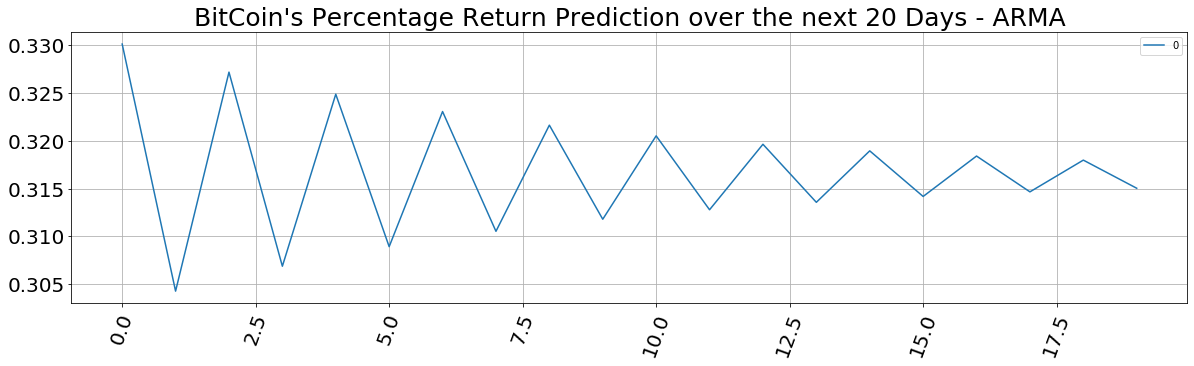

In [567]:
# Plot the forecasted return for the next 20 days
pd.DataFrame(results_5.forecast(steps=20)[0]).plot(
    figsize=(20,5),
    fontsize=20,
    rot=70,
    #subplots=True,
    grid=True);
plt.title(label="BitCoin's Percentage Return Prediction over the next 20 Days - ARMA", fontsize=25);